In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as mticker
sns.set_theme(style='whitegrid')

In [2]:
data = pd.read_csv('results.csv')

In [2]:
# plotting matmul coalesced only with incresing coalescing factor
def myplot(data, name, ax=None, filter=None):
    local_data = data.copy()
    if filter is not None:
        local_data = local_data[filter]
    local_data = local_data.loc[data['name'] == name]
    # local_data = local_data.loc[local_data['COALESCING'] < 16]
    local_data = local_data.loc[local_data['time'] > 0.5]
    blocks = [8, 16, 32]
    times = [list(local_data.loc[local_data['BLOCK_SIZE'] == b]['time']) for b in blocks]
    occupancy = [list(local_data.loc[local_data['BLOCK_SIZE'] == b]['active_blocks']) for b in blocks]
    registers = [list(local_data.loc[local_data['BLOCK_SIZE'] == b]['attr.numRegs']) for b in blocks]
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    for block_size, t, o, rr in zip(blocks, times, occupancy, registers):
        ax.plot([1, 2, 4, 8, 16][:len(t)], t, 'o-')
        for x, y, b, r in zip([1, 2, 4, 8, 16][:len(t)], t, o, rr):
            ax.text(x, y, f'{b*block_size*block_size/2048}\n({r})', ha="center", va="bottom")
    ax.set_title(f'{name}')
    ax.set_ylabel('time [ms]')
    ax.set_xlabel('coalescing factor')
    ax.legend([f'{b}x{b}' for b in blocks], title='Block size')
    ax.set_xscale('log')
    ax.set_ylim(ymin=0)
    ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

# plotting matmul coalesced only with incresing coalescing factor
def myplot_coalescing(data, name, ax=None, filter=None):
    local_data = data.copy()
    if filter is not None:
        local_data = local_data[filter]
    local_data = local_data.loc[data['name'] == name]
    # local_data = local_data.loc[local_data['COALESCING'] < 16]
    local_data = local_data.loc[local_data['time'] > 0.5]
    blocks = [8, 16, 32]
    coalescings = [1, 2, 4, 8, 16]
    times = [list(local_data.loc[local_data['COALESCING'] == c]['time']) for c in coalescings]
    block_sizes = [list(local_data.loc[local_data['COALESCING'] == c]['BLOCK_SIZE']) for c in coalescings]
    occupancy = [list(local_data.loc[local_data['COALESCING'] == c]['active_blocks']) for c in coalescings]
    registers = [list(local_data.loc[local_data['COALESCING'] == c]['attr.numRegs']) for c in coalescings]
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    for block_size, t, o, rr in zip(block_sizes, times, occupancy, registers):
        ax.plot(blocks[:len(t)], t, 'o-')
        for bs, x, y, b, r in zip(block_size, blocks[:len(t)], t, o, rr):
            ax.text(x, y, f'{b*bs*bs/2048}\n({r})', ha="center", va="bottom")
    ax.set_title(f'{name}')
    ax.set_ylabel('time [ms]')
    ax.set_xlabel('block size (BxB)')
    ax.legend([f'{b}x{b}' for b in coalescings], title='Coalescing')
    # ax.set_xscale('log')
    ax.set_ylim(ymin=0)
    ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())

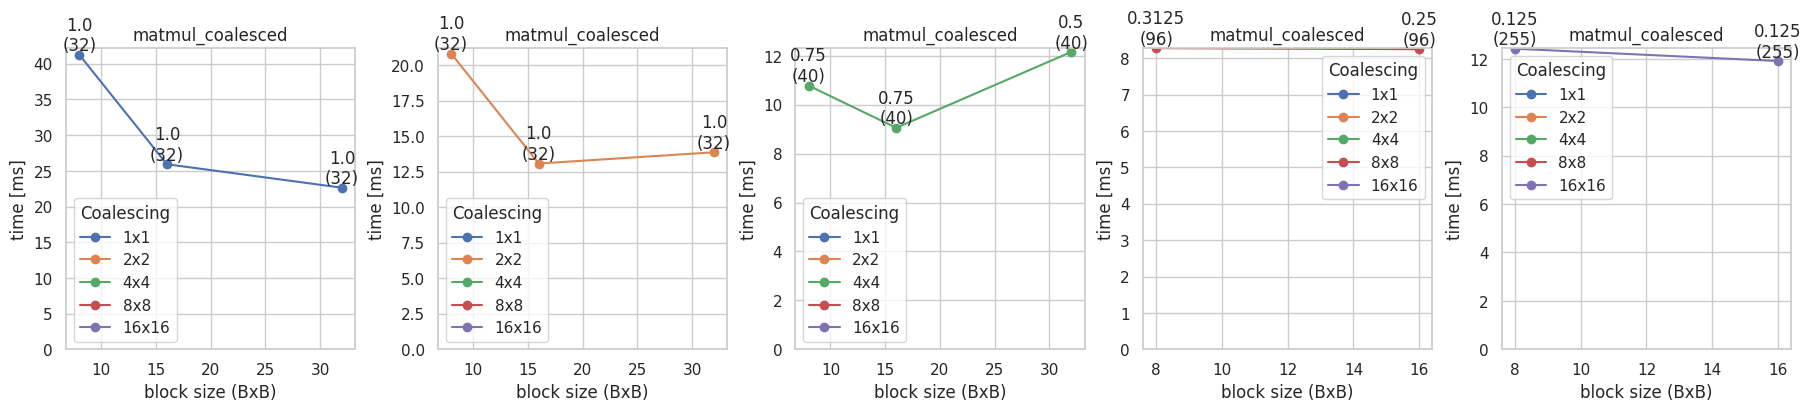

In [80]:
fig, axes = plt.subplots(1, 5, layout="constrained", figsize=(18, 4))
for b, ax in zip([1, 2, 4, 8, 16], axes):
    myplot_coalescing(data, 'matmul_coalesced', ax, data['COALESCING'] == b)
    # myplot(data, 'matmul_tiled_coalesced', ax, data['BLOCK_SIZE'] == b)

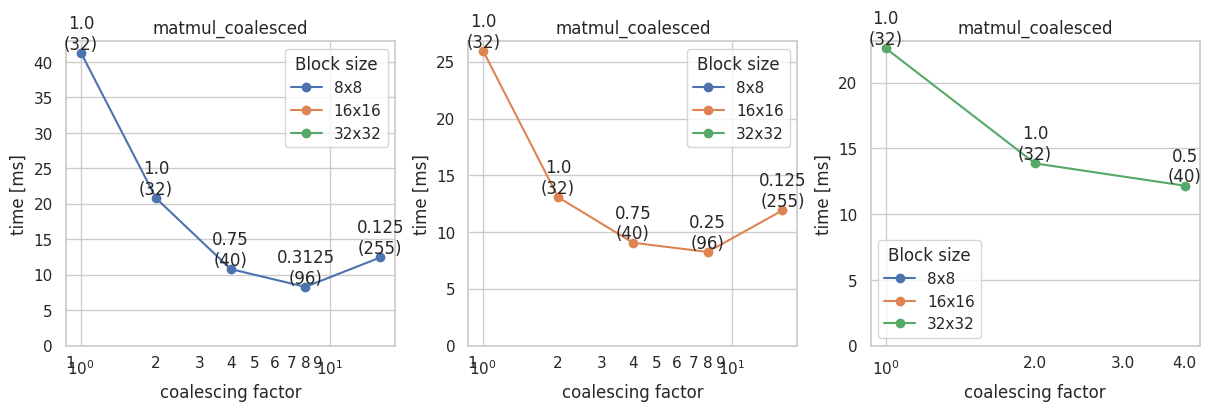

In [83]:
fig, axes = plt.subplots(1, 3, layout="constrained", figsize=(12, 4))
for b, ax in zip([8, 16, 32], axes):
    myplot(data, 'matmul_coalesced', ax, data['BLOCK_SIZE'] == b)

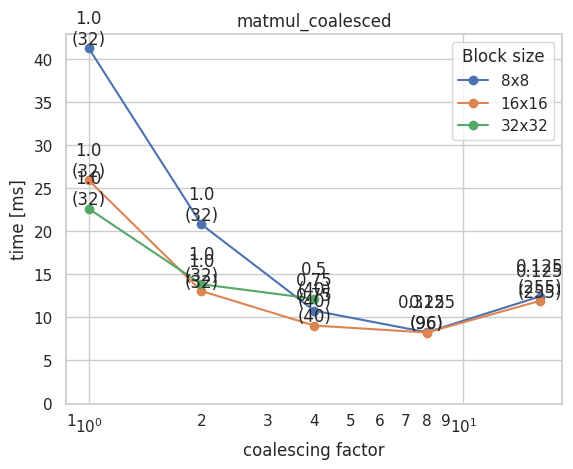

In [81]:
myplot(data, 'matmul_coalesced')

In [8]:
new_data = pd.read_csv('results.csv')
# new_data = new_data.loc[new_data['name'].isin(['matmul_coalesced', 'matmul_coalesced_hor'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_coalesced_strided', 'greg', 'matmul_tiled_coalesced_strided'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_coalesced', 'matmul_coalesced_strided'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_coalesced', 'matmul_coalesced_strided', 'matmul_tiled_coalesced', 'matmul_tiled_coalesced_strided'])]
new_data = new_data.loc[new_data['name'].isin(['matmul_tiled_coalesced', 'matmul_tiled_coalesced_strided', 'cublas', 'matmul_tiled_coalesced_strided_halved'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_coalesced', 'matreduce_A'])]
# new_data = new_data.loc[new_data['name'].isin(['matreduce_A', 'matreduce_A_hor', 'matreduce_A_ver'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_tiled_coalesced', 'matmul_tiled_coalesced_wrong'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_tiled_coalesced', 'matmul_coalesced'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_coalesced', 'matmul_tiled_coalesced', 'matmul_tiled_coalesced_just_B', 'matmul_tiled_coalesced_just_A'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_coalesced', 'matmul_tiled_coalesced_just_B', 'matmul_tiled_coalesced_just_A'])]
# new_data = new_data.loc[new_data['name'].isin(['matmul_tiled_coalesced', 'matmul_tiled_coalesced_wrong'])]
# new_data = new_data.loc[new_data['name'] != 'matmul_tiled_coalesced2']
# new_data = new_data.loc[new_data['name'] == 'matmul_tiled_coalesced']
# new_data = new_data.loc[new_data['name'] == 'matmul_coalesced']
# new_data = new_data.loc[new_data['name'] == 'matreduce_B']
# new_data = new_data.loc[new_data['name'] == 'matmul_tiled_coalesced']
# new_data = new_data.loc[new_data['COALESCING'] == 1]
# new_data = new_data.loc[new_data['COALESCING'] != 1]
new_data = new_data.loc[new_data['time'] > 1]
# new_data = new_data.loc[new_data['attr.numRegs'] < 255]

In [4]:
def mybarplot(new_data, ax=None):
    names = []
    times = []
    for index, row in new_data.iterrows():
        b = row["BLOCK_SIZE"]
        if 'hor' in row['name'] or 'ver' in row['name']:
            names.append(f'{row["name"]} ({b}*{b},{row["BLOCK_TILE"]},{row["COALESCING"]},{row["active_blocks"]*b*b/2048},{row["attr.numRegs"]})')
        else:
            names.append(f'{row["name"]} ({b}x{b},{row["BLOCK_TILE"]},{row["COALESCING"]},{row["active_blocks"]*b*b/2048},{row["attr.numRegs"]})')
        times.append(row['time'])
    names = [x for _, x in sorted(zip(times, names))]
    times = sorted(times)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6,10))
    ax = sns.barplot({'kernel (block_size,coalescing,active_threads,registers)':names, 'time [ms]':times}, y='kernel (block_size,coalescing,active_threads,registers)', x='time [ms]', ax=ax)
    _ = ax.bar_label(ax.containers[0])
    # ax.set_xscale('log')
    # _ = plt.xticks(rotation=90)

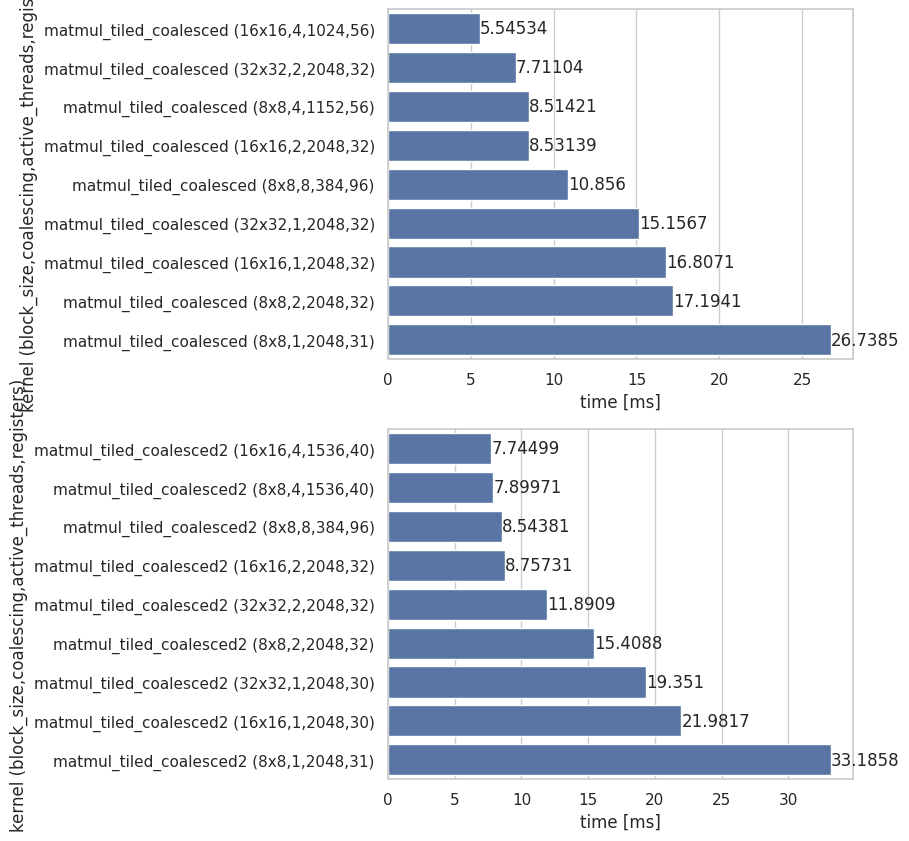

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(6,10))
for ax, name in zip(axes, ['matmul_tiled_coalesced', 'matmul_tiled_coalesced2']):
    new_data = pd.read_csv('results.csv')
    new_data = new_data.loc[new_data['name'] == name]
    new_data = new_data.loc[new_data['time'] > 1]
    # new_data = new_data.loc[new_data['COALESCING'] == 1]
    mybarplot(new_data, ax)

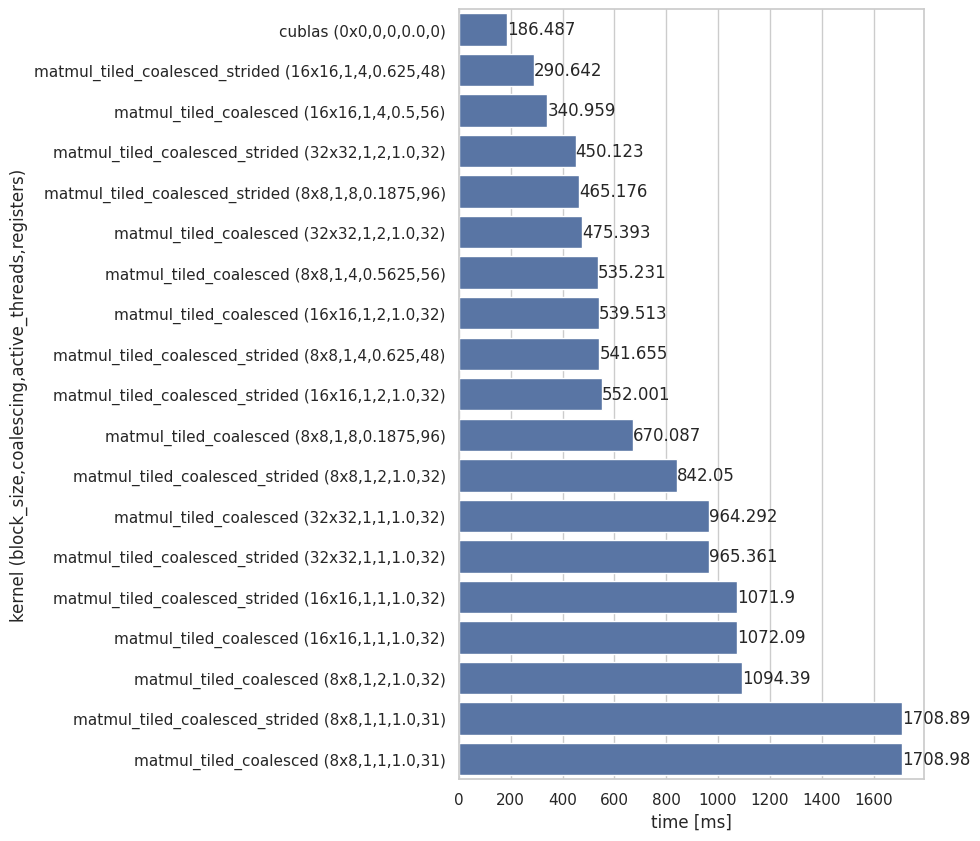

In [9]:
mybarplot(new_data)

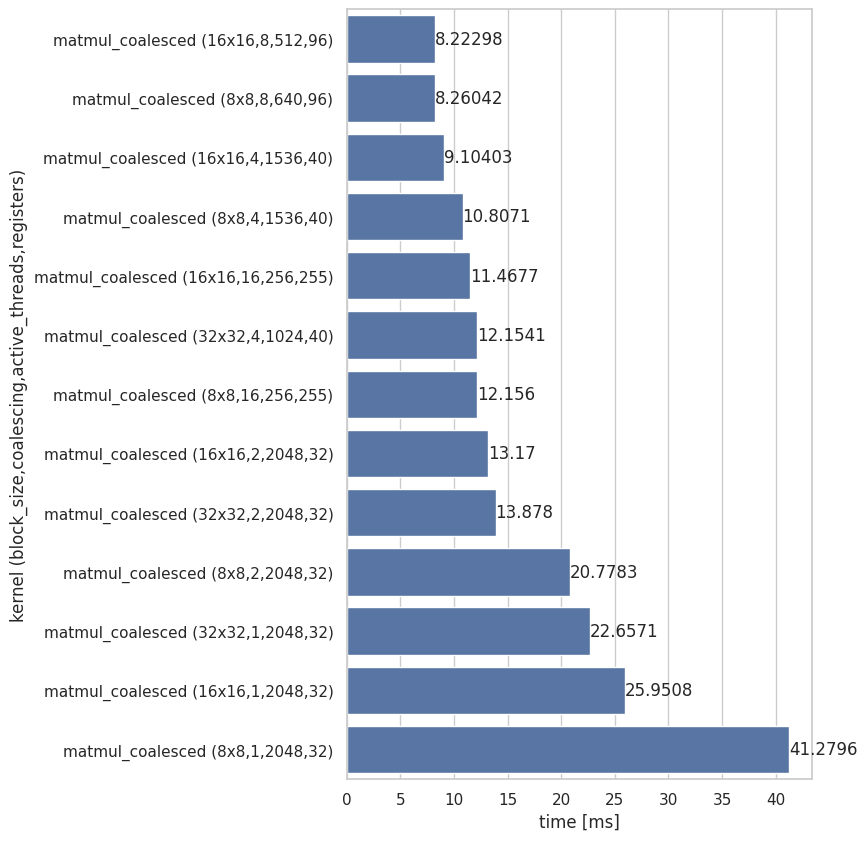

In [16]:
mybarplot(new_data)